In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, cross_validation, preprocessing, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
titanic_df = pd.read_excel('titanic3.xls', 'titanic3', index_col=None, na_values=['NA'])

The column heading variables have the following meanings:<br>
survival: Survival (0 = no; 1 = yes)<br>
class: Passenger class (1 = first; 2 = second; 3 = third)<br>
name: Name<br>
sex: Sex<br>
age: Age<br>
sibsp: Number of siblings/spouses aboard<br>
parch: Number of parents/children aboard<br>
ticket: Ticket number<br>
fare: Passenger fare<br>
cabin: Cabin<br>
embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)<br>
boat: Lifeboat (if survived)<br>
body: Body number (if did not survive and body was recovered)<br>

In [3]:
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


First, let’s examine the overall chance of survival for a Titanic passenger.

In [4]:
titanic_df['survived'].mean()

0.3819709702062643

The calculation shows that only 38% of the passengers survived.
<br>
<br>
We can group data by class and view the averages for each column:

In [5]:
titanic_df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


passengers in first class had a 62% chance of survival, compared to a 25.5% chance for those in 3rd class

Grouping function for both class and sex

In [6]:
class_sex_grouping = titanic_df.groupby(['pclass','sex']).mean()
class_sex_grouping

survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

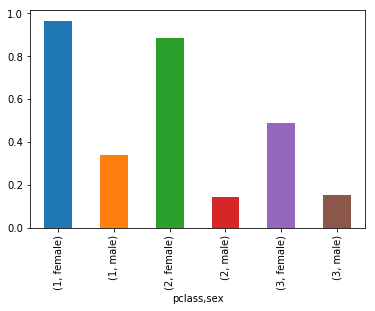

In [7]:
class_sex_grouping['survived'].plot.bar()

In [8]:
group_by_age = pd.cut(titanic_df["age"], np.arange(0, 90, 10))

In [9]:
group_by_age

0       (20, 30]
1        (0, 10]
2        (0, 10]
3       (20, 30]
4       (20, 30]
5       (40, 50]
6       (60, 70]
7       (30, 40]
8       (50, 60]
9       (70, 80]
10      (40, 50]
11      (10, 20]
12      (20, 30]
13      (20, 30]
14      (70, 80]
15           NaN
16      (20, 30]
17      (40, 50]
18      (30, 40]
19      (30, 40]
20      (30, 40]
21      (40, 50]
22      (20, 30]
23      (40, 50]
24      (20, 30]
25      (20, 30]
26      (20, 30]
27      (10, 20]
28      (30, 40]
29      (20, 30]
          ...   
1279    (10, 20]
1280    (20, 30]
1281    (20, 30]
1282         NaN
1283         NaN
1284         NaN
1285    (30, 40]
1286    (30, 40]
1287    (50, 60]
1288    (10, 20]
1289    (20, 30]
1290    (40, 50]
1291         NaN
1292         NaN
1293         NaN
1294    (20, 30]
1295    (20, 30]
1296    (20, 30]
1297         NaN
1298    (30, 40]
1299    (20, 30]
1300    (10, 20]
1301    (40, 50]
1302         NaN
1303         NaN
1304    (10, 20]
1305         NaN
1306    (20, 3

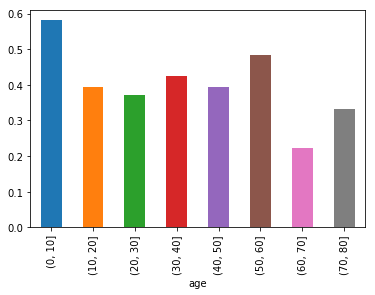

In [10]:
age_grouping = titanic_df.groupby(group_by_age).mean()
age_grouping['survived'].plot.bar()

In [11]:
titanic_df.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [20]:
titanic_df = titanic_df.drop(['body','cabin','boat'], axis=1)

In [23]:
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,S,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,S,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,S,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,S,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,C,"Montevideo, Uruguay"


In [12]:
pd.DataFrame.drop?

In [19]:
titanic_df["home.dest"] = titanic_df["home.dest"].fillna("NA")

In [16]:
pd.DataFrame.fillna?

In [26]:
titanic_df = titanic_df.dropna()

In [25]:
pd.DataFrame.dropna?

In [71]:
pd.DataFrame.dropna?

In [27]:
titanic_df.count()

pclass       1043
survived     1043
name         1043
sex          1043
age          1043
sibsp        1043
parch        1043
ticket       1043
fare         1043
embarked     1043
home.dest    1043
dtype: int64

In [28]:
def preprocess_titanic_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.sex = le.fit_transform(processed_df.sex)
    processed_df.embarked = le.fit_transform(processed_df.embarked)
    processed_df = processed_df.drop(['name','ticket','home.dest'],axis=1)
    return processed_df

In [29]:
processed_df = preprocess_titanic_df(titanic_df)

In [30]:
processed_df

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,2
1,1,1,1,0.9167,1,2,151.5500,2
2,1,0,0,2.0000,1,2,151.5500,2
3,1,0,1,30.0000,1,2,151.5500,2
4,1,0,0,25.0000,1,2,151.5500,2
5,1,1,1,48.0000,0,0,26.5500,2
6,1,1,0,63.0000,1,0,77.9583,2
7,1,0,1,39.0000,0,0,0.0000,2
8,1,1,0,53.0000,2,0,51.4792,2
9,1,0,1,71.0000,0,0,49.5042,0


In [31]:
X = processed_df.drop(['survived'], axis=1).values
y = processed_df['survived'].values

In [32]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2, random_state = 0)

accuracy of the model could vary depending on which rows were selected for the training and test sets.

In [33]:
mlp = MLPClassifier(hidden_layer_sizes=(20,10), max_iter=1000, activation = "logistic", solver = "lbfgs", learning_rate_init=0.9, learning_rate = "constant", verbose = True, early_stopping = False, tol=0.001, random_state = 10000)

In [34]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 10), learning_rate='constant',
       learning_rate_init=0.9, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10000,
       shuffle=True, solver='lbfgs', tol=0.001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [35]:
predictions = mlp.predict(X_test)

In [36]:
accuracy_score(y_test, predictions)

0.81818181818181823

adding the values in sibsp and parch to family size

In [39]:
processed_df

,pclass,survived,sex,age,sibsp,parch,fare,embarked,family_size
0,1,1,0,29.0000,0,0,211.3375,2,0
1,1,1,1,0.9167,1,2,151.5500,2,3
2,1,0,0,2.0000,1,2,151.5500,2,3
3,1,0,1,30.0000,1,2,151.5500,2,3
4,1,0,0,25.0000,1,2,151.5500,2,3
5,1,1,1,48.0000,0,0,26.5500,2,0
6,1,1,0,63.0000,1,0,77.9583,2,1
7,1,0,1,39.0000,0,0,0.0000,2,0
8,1,1,0,53.0000,2,0,51.4792,2,2
9,1,0,1,71.0000,0,0,49.5042,0,0


In [38]:
processed_df["family_size"] = processed_df["parch"] + processed_df["sibsp"]

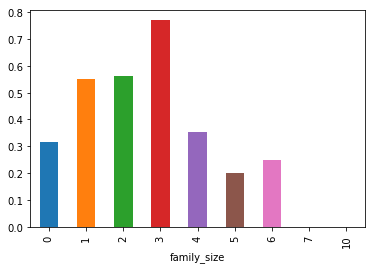

In [41]:
processed_df.groupby("family_size").mean()["survived"].plot.bar()

In [56]:
processed_df = processed_df.drop(['parch', 'sibsp'],axis=1)

ValueError: labels ['parch' 'sibsp'] not contained in axis

In [43]:
X = processed_df.drop(['survived'], axis=1).values
y = processed_df['survived'].values
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2, random_state = 0)

In [52]:
mlp = MLPClassifier(hidden_layer_sizes=(20), max_iter=1000, activation = "logistic", solver = "lbfgs", learning_rate_init=0.9, learning_rate = "constant", verbose = True, early_stopping = False, tol=0.001, random_state = 10000)

In [53]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=20, learning_rate='constant',
       learning_rate_init=0.9, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10000,
       shuffle=True, solver='lbfgs', tol=0.001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [54]:
predictions = mlp.predict(X_test)

In [55]:
accuracy_score(y_test, predictions)

0.82296650717703346